100%|██████████| 101k/101k [00:00<00:00, 2.85MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--- ResNet50 ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           9,408
       BatchNorm2d-2         [-1, 64, 150, 150]             128
              ReLU-3         [-1, 64, 150, 150]               0
         MaxPool2d-4           [-1, 64, 75, 75]               0
            Conv2d-5           [-1, 64, 75, 75]           4,096
       BatchNorm2d-6           [-1, 64, 75, 75]             128
              ReLU-7           [-1, 64, 75, 75]               0
            Conv2d-8           [-1, 64, 75, 75]          36,864
       BatchNorm2d-9           [-1, 64, 75, 75]             128
             ReLU-10           [-1, 64, 75, 75]               0
           Conv2d-11          [-1, 256, 75, 75]          16,384
      BatchNorm2d-12          [-1, 256, 75, 75]             512
           Conv2d-13          [-1, 256, 75, 75]          16,384
      BatchNorm2d-14  

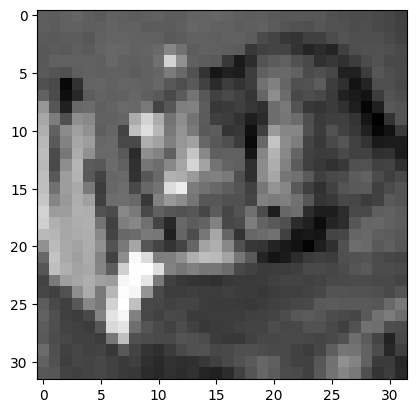

predict:school_bus
correct:cat


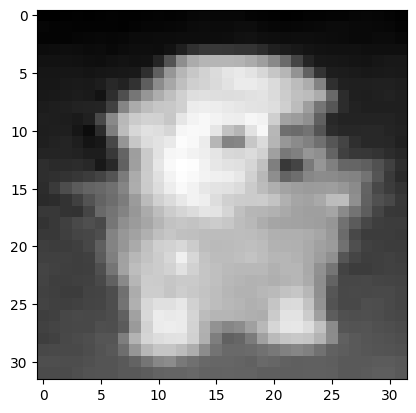

predict:groom
correct:dog


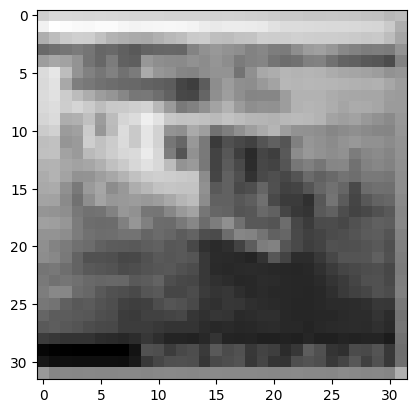

predict:forklift
correct:ship


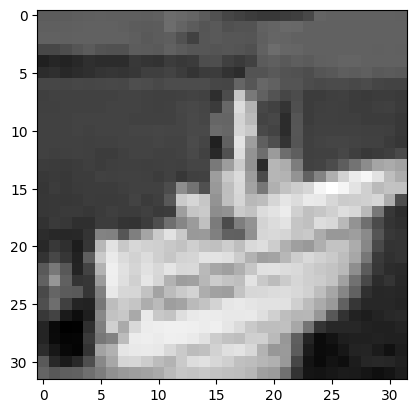

predict:liner
correct:ship


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

test acc: 2e-06   , test loss: 0.249581

--- WideResNet50 ---
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           9,408
       BatchNorm2d-2         [-1, 64, 150, 150]             128
              ReLU-3         [-1, 64, 150, 150]               0
         MaxPool2d-4           [-1, 64, 75, 75]               0
            Conv2d-5          [-1, 128, 75, 75]           8,192
       BatchNorm2d-6          [-1, 128, 75, 75]             256
              ReLU-7          [-1, 128, 75, 75]               0
            Conv2d-8          [-1, 128, 75, 75]         147,456
       BatchNorm2d-9          [-1, 128, 75, 75]             256
             ReLU-10          [-1, 128, 75, 75]               0
           Conv2d-11          [-1, 256, 75, 75]          32,768
      BatchNorm2d-12          [-1, 256, 75, 75]             512
           Conv2d-13          [-1, 256, 7

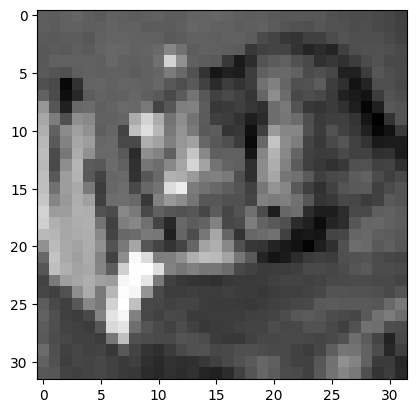

predict:snowmobile
correct:cat


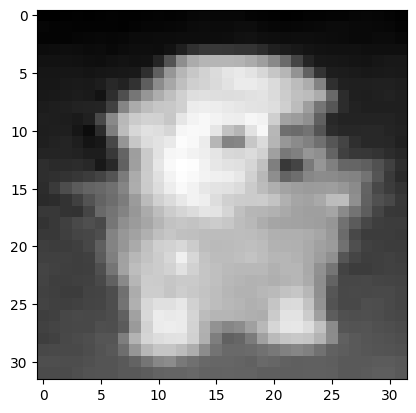

predict:monarch
correct:dog


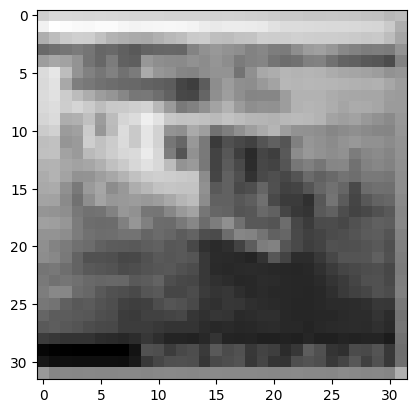

predict:forklift
correct:ship


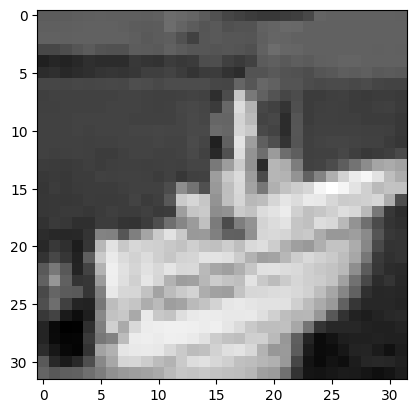

predict:liner
correct:ship
test acc: 7e-06   , test loss: 0.182642


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [3]:
import torch
import torchvision
from torchsummary import summary
from dataset import get_dataloaders
from utils import calc_score, get_imagenet_classes
from evaluate import evaluate_model

# 1. 環境準備
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 2. データ準備
train_loader, test_loader, class_names = get_dataloaders()
imagenet_classes = get_imagenet_classes()

# 3. ResNet50モデルの構築
print("--- ResNet50 ---")
model = torchvision.models.resnet50(pretrained=True).to(device)
summary(model, (3, 300, 300)) # ネットワーク構造を表示
evaluate_model(model, test_loader, device, imagenet_classes, class_names, calc_score)

# 使い終わったら即座に削除してメモリを空ける
del model
torch.cuda.empty_cache()

# 4. WideResNet50モデルの構築
print("\n--- WideResNet50 ---")
wide_model = torchvision.models.wide_resnet50_2(pretrained=True).to(device)
summary(wide_model, (3, 300, 300)) # ネットワーク構造を表示
evaluate_model(wide_model, test_loader, device, imagenet_classes, class_names, calc_score)